In [23]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.units as munits

In [24]:
#  load data
df=pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)

C:\Users\sylvi\AppData\Local\Temp\ipykernel_10484\346579293.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)


In [25]:
# sanity check
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247669,31-oct-2024 20:00,0,0.2,0,10.1,0,10.1,10.1,12.4,100,...,2,5,2,220,,,0.0,,0,8
247670,31-oct-2024 21:00,0,0.1,0,10.1,0,10.1,10.0,12.4,100,...,2,5,2,230,,,0.0,,0,8
247671,31-oct-2024 22:00,0,0.0,0,10.0,0,10.0,10.0,12.3,100,...,2,4,2,210,,,0.0,,0,8
247672,31-oct-2024 23:00,0,0.1,0,9.8,0,9.8,9.8,12.1,100,...,2,6,2,200,,,0.0,,0,8


In [ ]:
# split date and time into separate columns
df[['date', 'time']] = df['date'].str.split(' ', n=1, expand=True)

In [ ]:
# convert date column to datetime 
pd.to_datetime(df["date"])
df["date"]= pd.to_datetime(df['date'])
df["date"]

C:\Users\sylvi\AppData\Local\Temp\ipykernel_10484\3175054117.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df["date"])
C:\Users\sylvi\AppData\Local\Temp\ipykernel_10484\3175054117.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"]= pd.to_datetime(df['date'])


0        1996-04-10
1        1996-07-31
2        1996-07-31
3        1996-07-31
4        1996-07-31
            ...    
247669   2024-10-31
247670   2024-10-31
247671   2024-10-31
247672   2024-10-31
247673   2024-11-01
Name: date, Length: 247674, dtype: datetime64[ns]

In [ ]:
# set date column as index column
df.set_index('date', inplace=True)

In [29]:
df

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,time
date,,,,,,,,,,,,,,,,,,,,,
1996-04-10,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,...,0,0,0,25,81,0.0,35000,32,5,14:00
1996-07-31,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,...,0,0,0,25,82,0.0,40000,45,5,08:00
1996-07-31,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,...,0,0,0,80,81,0.0,8000,32,7,09:00
1996-07-31,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,...,0,0,0,25,82,0.0,28000,35,6,10:00
1996-07-31,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,...,0,0,0,2,11,0.0,40000,40,6,11:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31,0,0.2,0,10.1,0,10.1,10.1,12.4,100,1024.2,...,5,2,220,,,0.0,,0,8,20:00
2024-10-31,0,0.1,0,10.1,0,10.1,10.0,12.4,100,1023.9,...,5,2,230,,,0.0,,0,8,21:00
2024-10-31,0,0.0,0,10.0,0,10.0,10.0,12.3,100,1023.7,...,4,2,210,,,0.0,,0,8,22:00


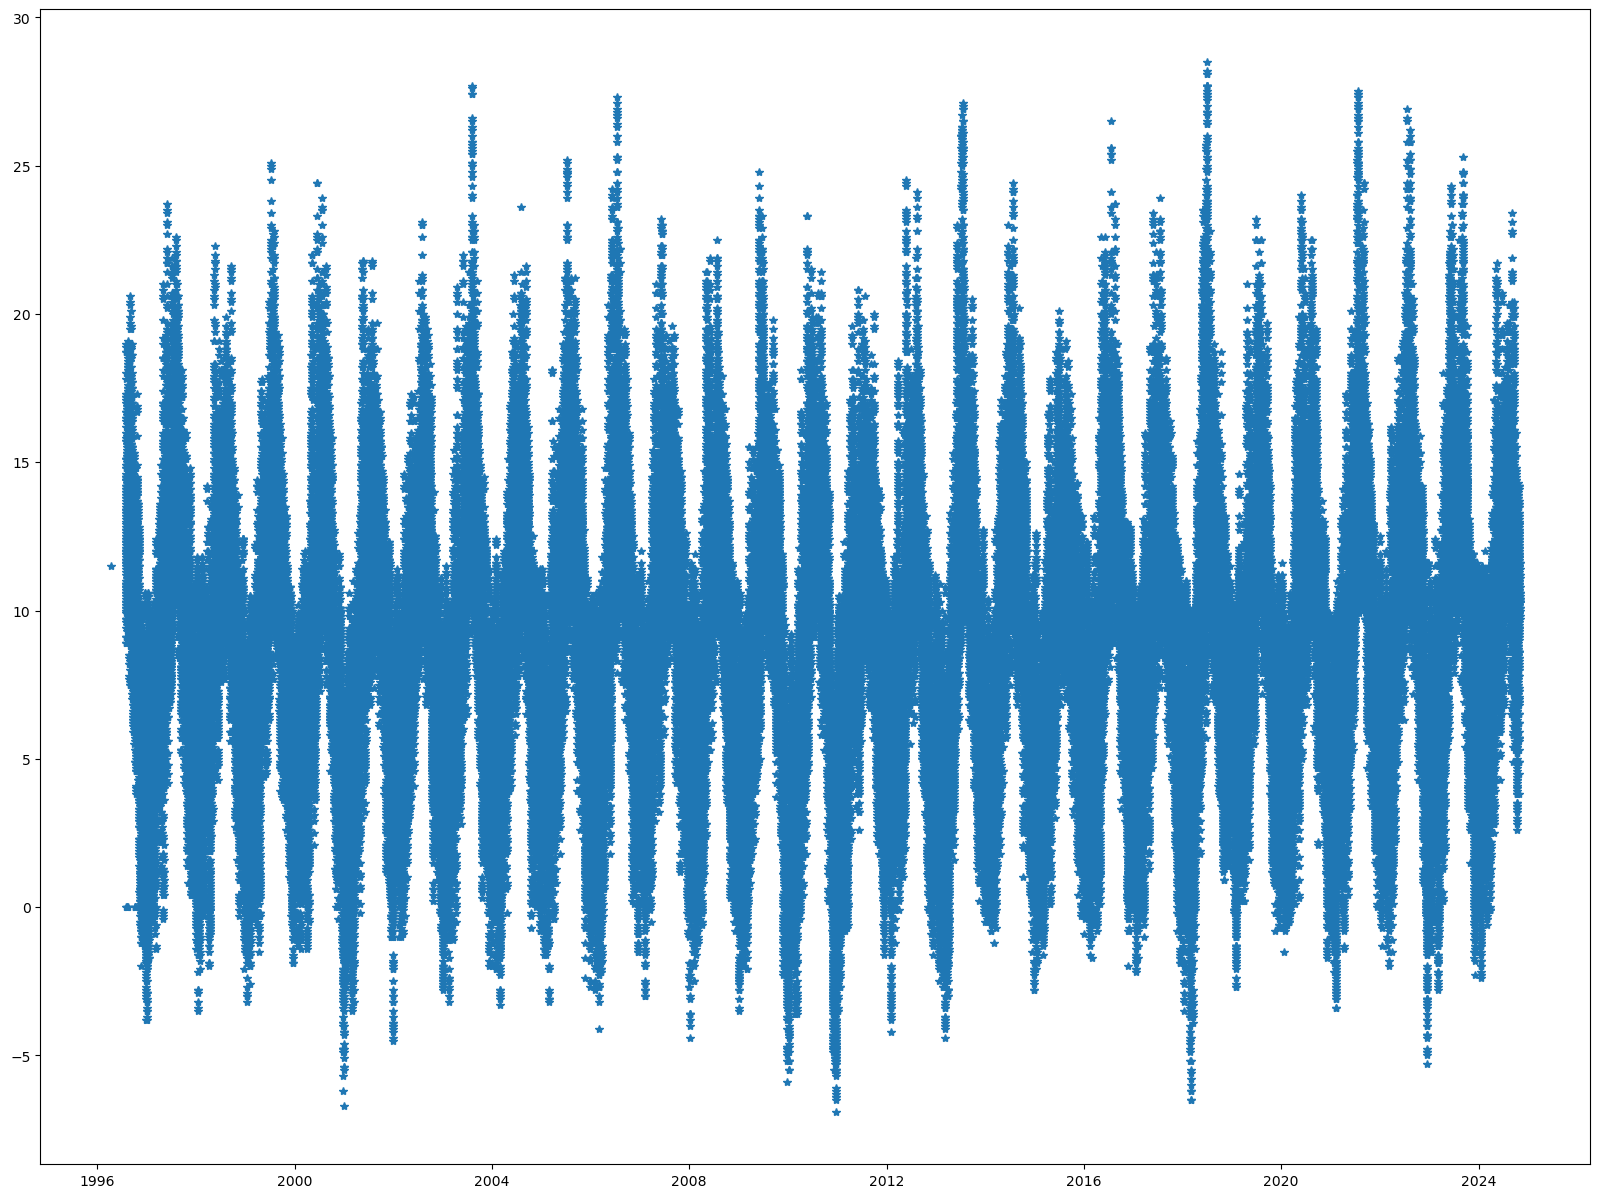

In [ ]:
# plot temperature vs date
fig, ax = plt.subplots(figsize=(20, 15))

temp=df["temp"]
temp=temp.to_numpy()

ax.plot(df.index, temp, "*")

## References
https://www.askpython.com/python-modules/pandas/data-frame-index-for-x-axis